In [1]:
import tensorflow as tf

# Check the device being used
print("Is TPU available?", "TPU" in str(tf.config.list_physical_devices()))

# To check if it's being recognized properly
print("TPU device:", tf.config.list_physical_devices('TPU'))

Is TPU available? True
TPU device: [PhysicalDevice(name='/physical_device:TPU:0', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:1', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:2', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:3', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:4', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:5', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:6', device_type='TPU'), PhysicalDevice(name='/physical_device:TPU:7', device_type='TPU')]


In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Oxford 102 Flower dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Show dataset info
print(info)

# The dataset is divided into training and test splits
train_ds, test_ds = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7JJ7ZR_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7JJ7ZR_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.7JJ7ZR_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

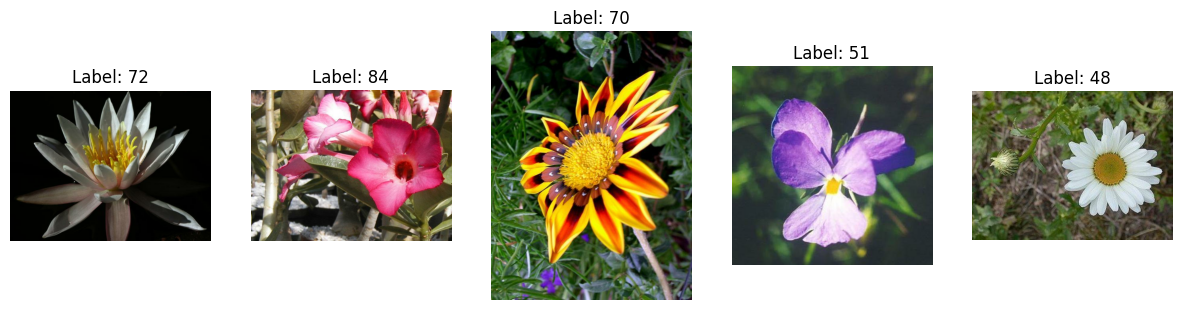

In [3]:
import tensorflow as tf

# Function to plot images from the dataset
def plot_images(dataset, n=5):
    plt.figure(figsize=(15, 10))
    for i, (image, label) in enumerate(dataset.take(n)):
        plt.subplot(1, n, i+1)
        plt.imshow(image.numpy())
        plt.axis('off')
        plt.title(f"Label: {label.numpy()}")
    plt.show()

# Display 5 random images from the training set
plot_images(train_ds)


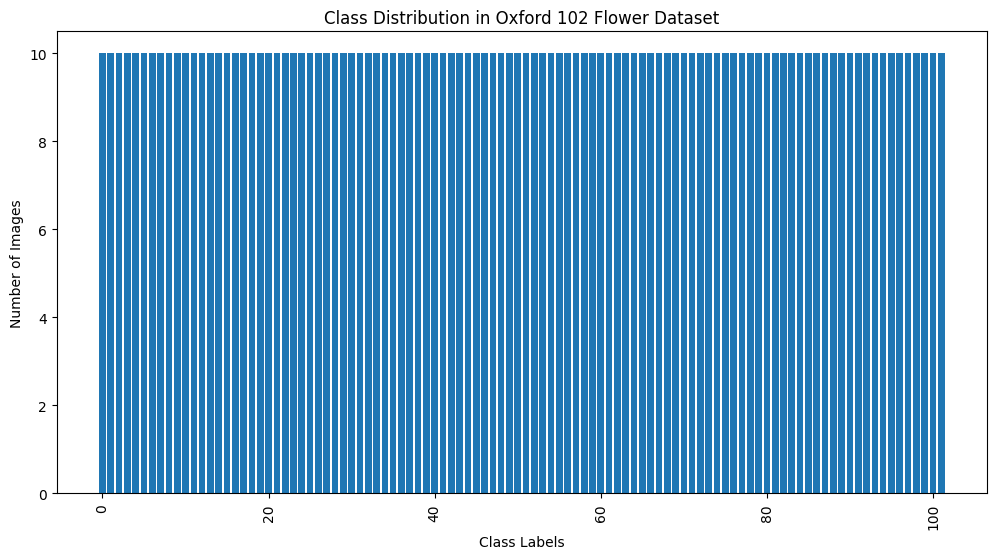

In [4]:
# Check class distribution in the training dataset
class_counts = {}
for _, label in train_ds:
    class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Visualize class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Oxford 102 Flower Dataset")
plt.xticks(rotation=90)
plt.show()


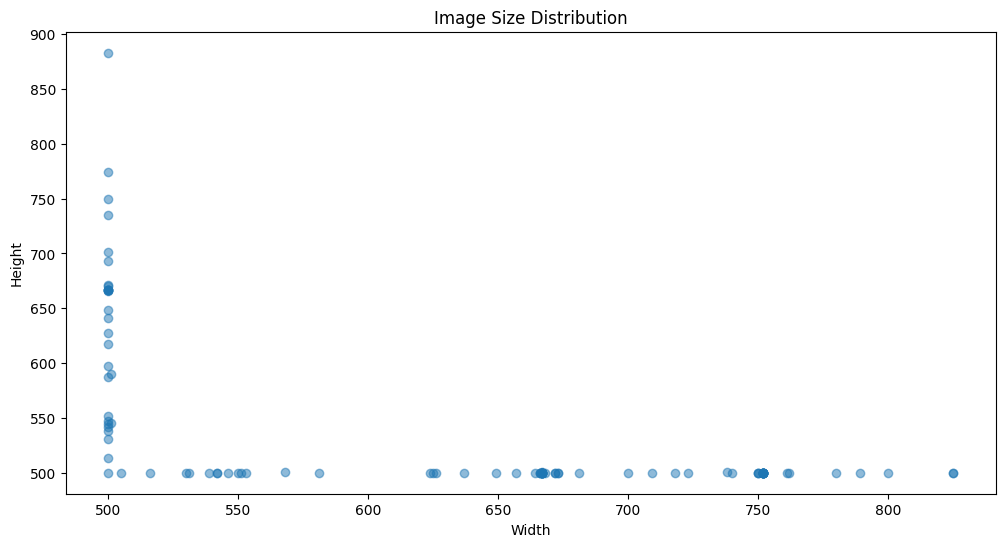

In [5]:
# Get image sizes
image_sizes = []
for image, _ in train_ds.take(100):
    image_sizes.append(image.shape)

# Plot the distribution of image sizes
height, width = zip(*[(h, w) for h, w, _ in image_sizes])

plt.figure(figsize=(12, 6))
plt.scatter(width, height, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()


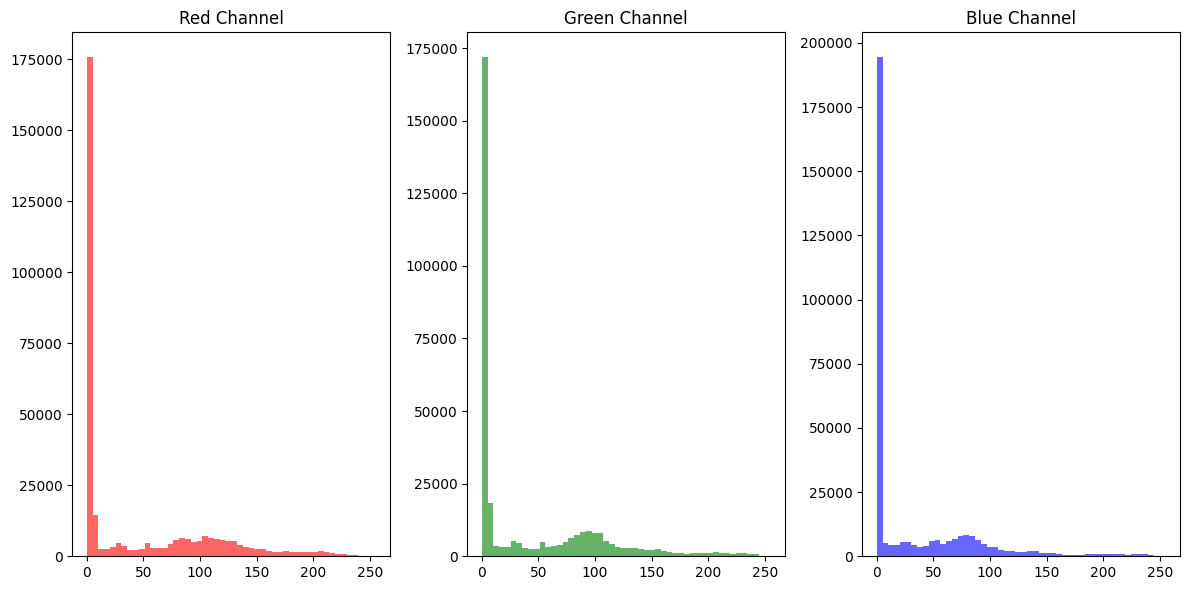

In [6]:
# Plot the distribution of pixel values (RGB channels) for a sample image
def plot_rgb_distribution(dataset, n=1):
    image, _ = next(iter(dataset))

    # Separate the RGB channels
    r, g, b = image[..., 0], image[..., 1], image[..., 2]

    # Plot the histograms for each channel
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.hist(r.numpy().flatten(), bins=50, color='red', alpha=0.6)
    plt.title("Red Channel")

    plt.subplot(1, 3, 2)
    plt.hist(g.numpy().flatten(), bins=50, color='green', alpha=0.6)
    plt.title("Green Channel")

    plt.subplot(1, 3, 3)
    plt.hist(b.numpy().flatten(), bins=50, color='blue', alpha=0.6)
    plt.title("Blue Channel")

    plt.tight_layout()
    plt.show()

# Plot RGB distribution of the first image
plot_rgb_distribution(train_ds)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


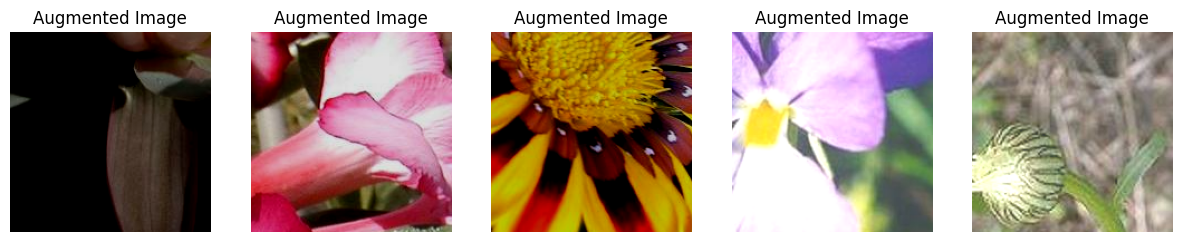

In [7]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa


# Function to apply basic augmentation techniques
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_crop(image, size=[180, 180, 3])  # Crop to 180x180
    image = tf.image.random_brightness(image, max_delta=0.3)  # Random brightness
    return image

# Display augmented images
def plot_augmented_images(dataset, n=5):
    plt.figure(figsize=(15, 10))
    for i, (image, _) in enumerate(dataset.take(n)):
        augmented_image = augment_image(image)
        plt.subplot(1, n, i+1)
        plt.imshow(augmented_image.numpy())
        plt.axis('off')
        plt.title("Augmented Image")
    plt.show()

# Display augmented images
plot_augmented_images(train_ds)


In [8]:
import numpy as np
import tensorflow as tf

# Calculate the mean and standard deviation of pixel values
def compute_image_stats(dataset, num_images=100):
    means, stds = [], []
    for image, _ in dataset.take(num_images):
        image = tf.cast(image, tf.float32)  # Convert image to float32
        means.append(tf.reduce_mean(image, axis=(0, 1)).numpy())  # Mean per channel
        stds.append(tf.math.reduce_std(image, axis=(0, 1)).numpy())  # Std per channel

    mean = np.mean(means, axis=0)
    std = np.mean(stds, axis=0)

    return mean, std

# Compute mean and standard deviation for the training dataset
mean, std = compute_image_stats(train_ds)

# Print the results
print(f"Mean pixel values (R, G, B): {mean}")
print(f"Standard deviation (R, G, B): {std}")



Mean pixel values (R, G, B): [112.05083  93.7508   72.66497]
Standard deviation (R, G, B): [66.89853  54.034966 55.455532]


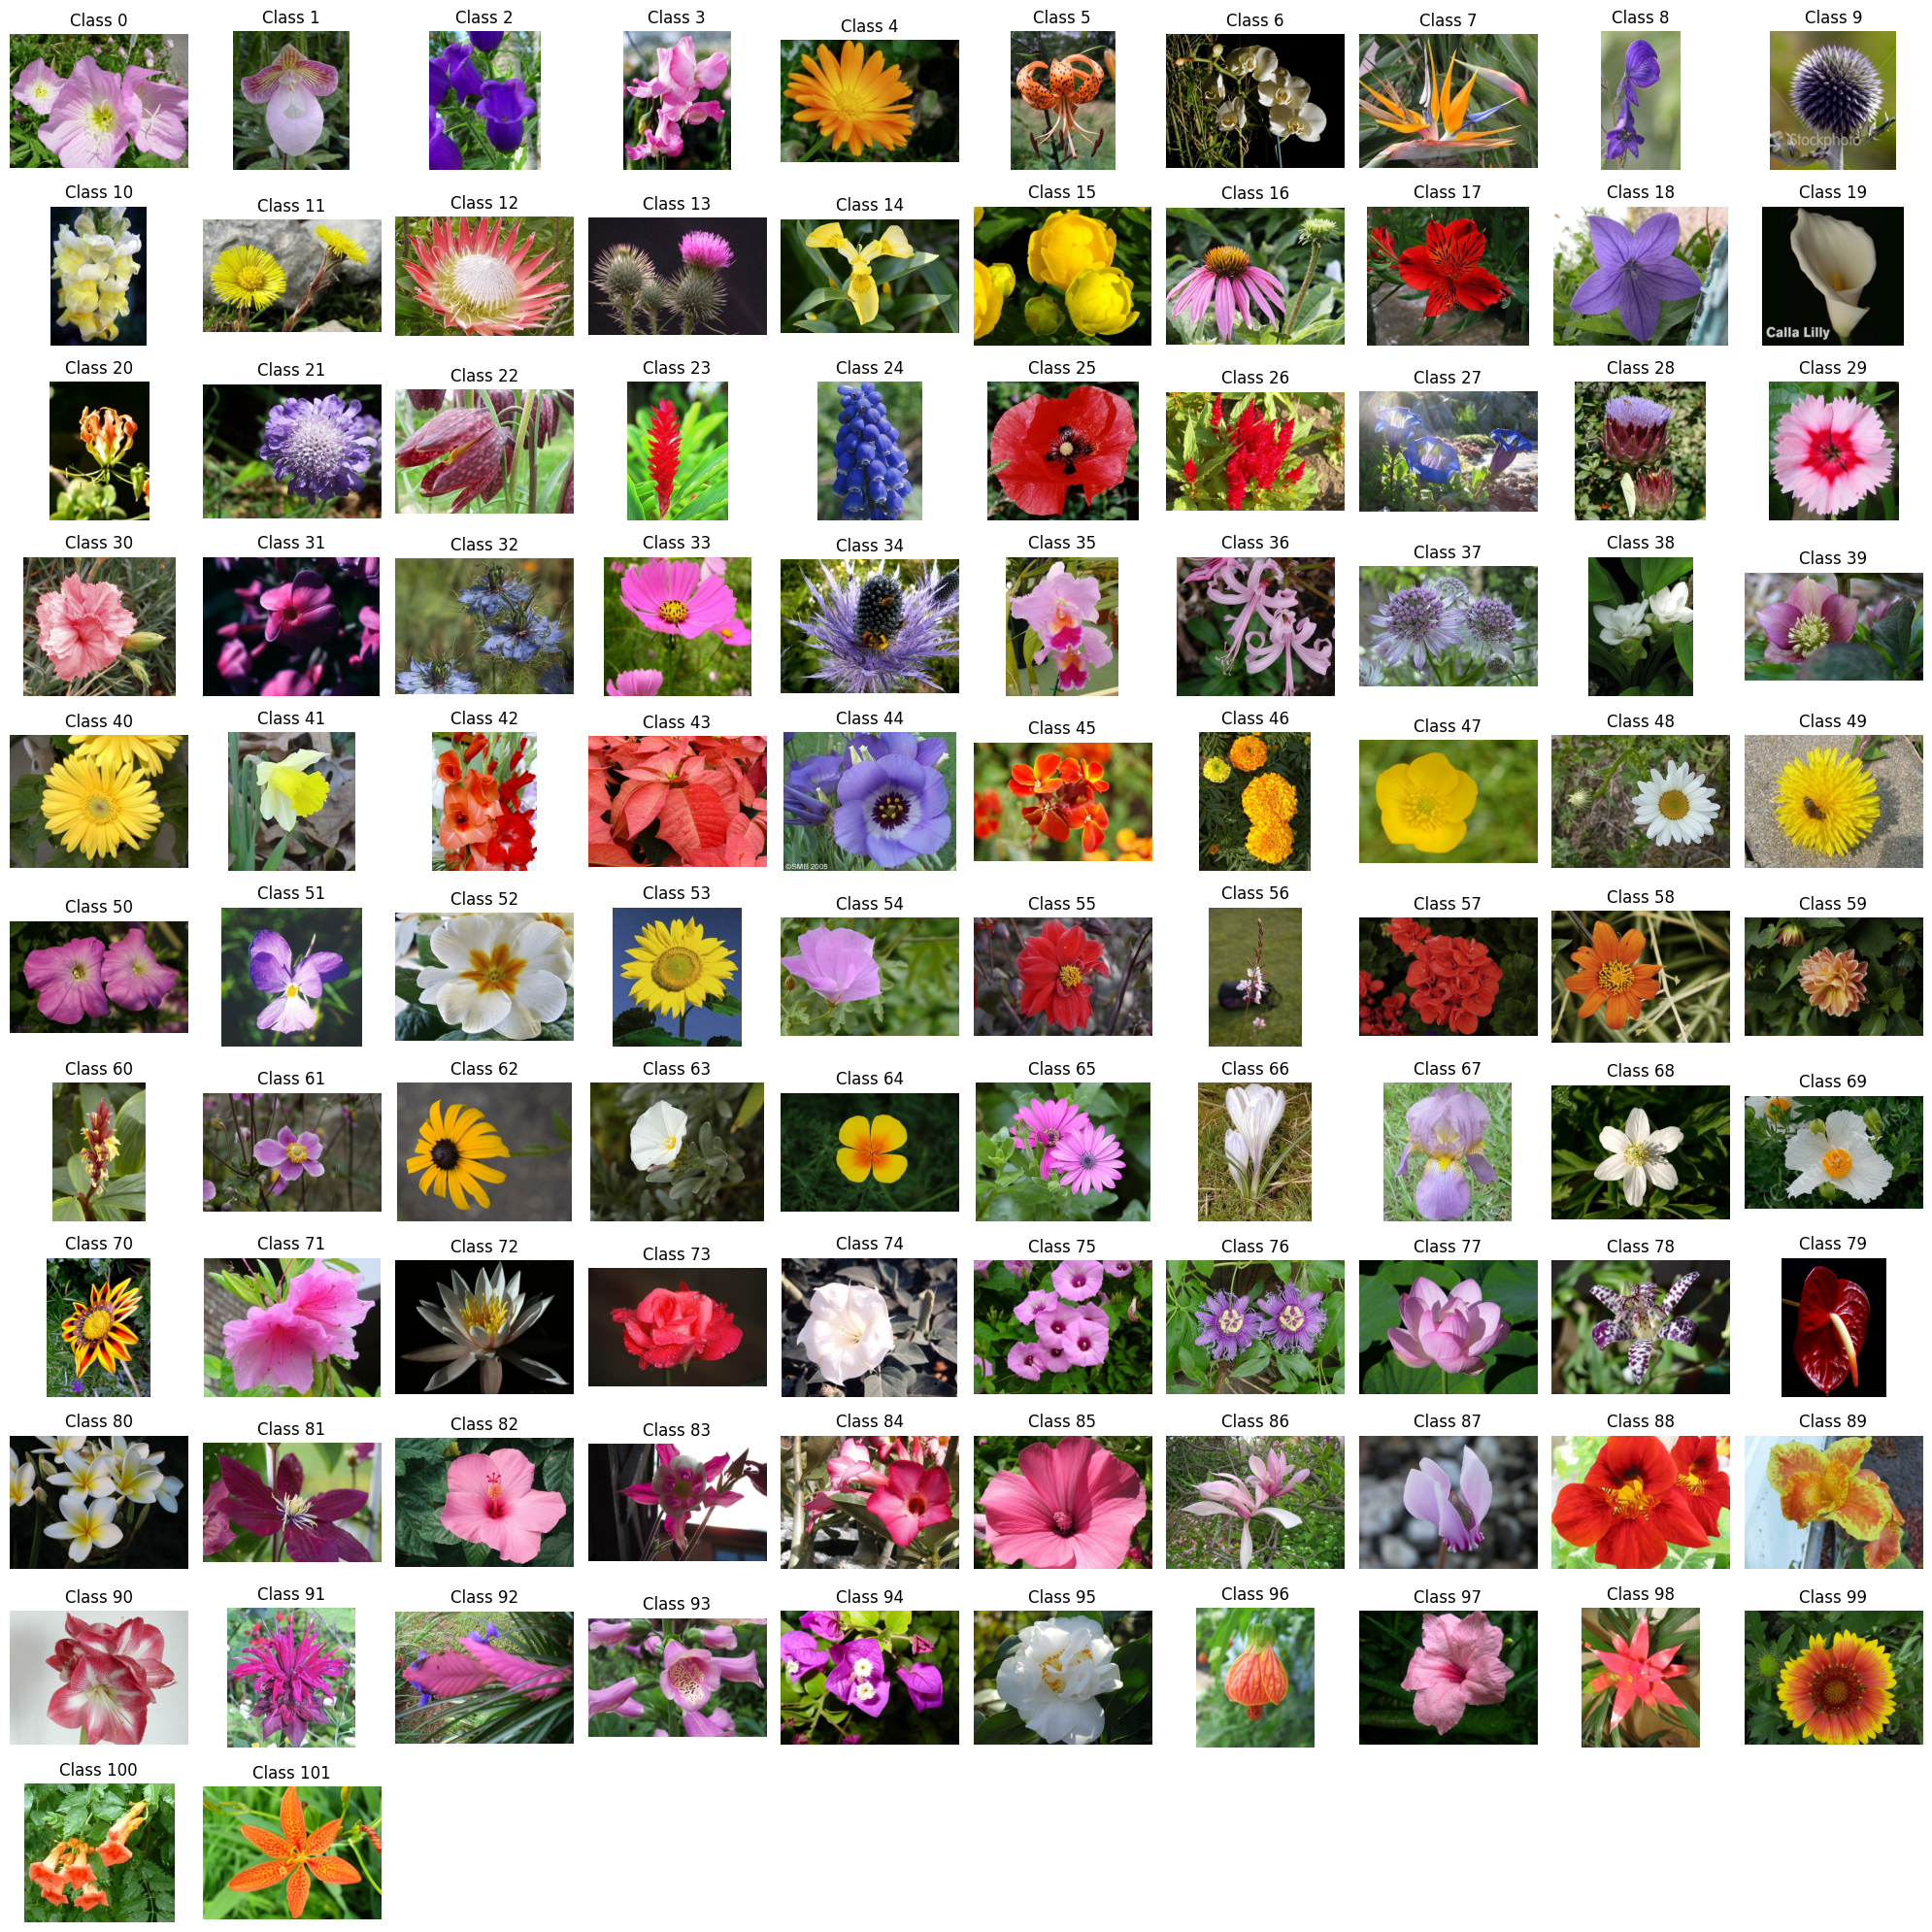

In [9]:
def plot_one_image_per_class(dataset, num_classes=102):
    plt.figure(figsize=(20, 20))
    for label in range(num_classes):
        # Find the first image from each class
        for image, image_label in dataset:
            if image_label == label:
                plt.subplot(11, 10, label+1)
                plt.imshow(image.numpy())
                plt.axis('off')
                plt.title(f"Class {label}")
                break
    plt.tight_layout()
    plt.show()

# Display one image from each class
plot_one_image_per_class(train_ds)


In [11]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN model for the Oxford 102 Flowers dataset
def create_model(input_shape=(224, 224, 3), num_classes=102):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare data (assuming preprocessed datasets `train_ds` and `val_ds`)
AUTOTUNE = tf.data.AUTOTUNE
import tensorflow_datasets as tfds

# Load the dataset with train, validation, and test splits
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_ds = dataset['train']
val_ds = dataset['validation']
test_ds = dataset['test']
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)) / 255.0, y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)) / 255.0, y))

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(buffer_size=AUTOTUNE)

# Create and train the model
model = create_model()
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

# Save the model
model.save("flower_model.h5")


Epoch 1/5
32/32 [==============================] - 114s 4s/step - loss: 4.8461 - accuracy: 0.0078 - val_loss: 4.5773 - val_accuracy: 0.0206
Epoch 2/5
32/32 [==============================] - 108s 3s/step - loss: 4.4261 - accuracy: 0.0343 - val_loss: 4.2462 - val_accuracy: 0.0422
Epoch 3/5
32/32 [==============================] - 109s 3s/step - loss: 3.7371 - accuracy: 0.1157 - val_loss: 3.8655 - val_accuracy: 0.1000
Epoch 4/5
32/32 [==============================] - 109s 3s/step - loss: 2.4447 - accuracy: 0.4147 - val_loss: 4.1377 - val_accuracy: 0.1284
Epoch 5/5
32/32 [==============================] - 109s 3s/step - loss: 0.8813 - accuracy: 0.7775 - val_loss: 5.6275 - val_accuracy: 0.1196


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


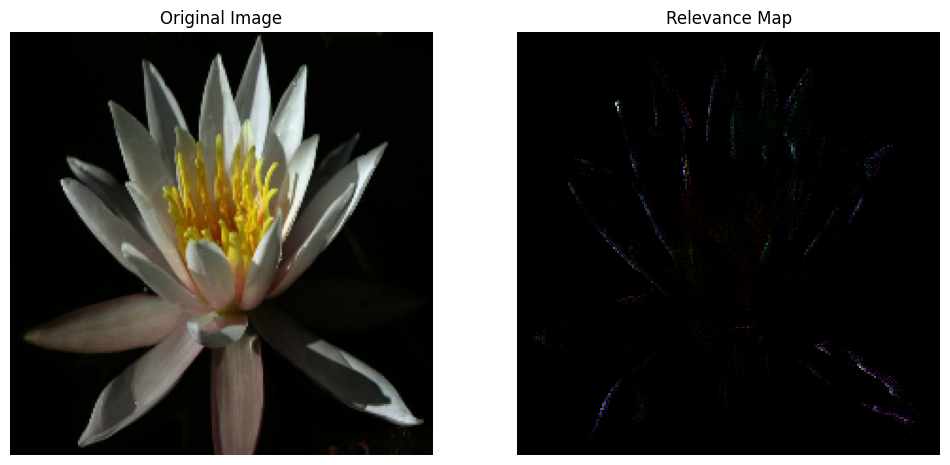

In [20]:
import tensorflow_datasets as tfds
import tensorflow.compat.v1 as tf1
import innvestigate
import matplotlib.pyplot as plt



# Disable eager execution for compatibility with innvestigate
tf1.disable_eager_execution()

# Load the trained model
model = tf.keras.models.load_model("flower_model.h5")

# Preprocessing function
def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))  # Resize to match model input size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load the Oxford Flowers dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Access the 'train' split and preprocess it
train_ds = dataset['train']
preprocessed_ds = train_ds.map(lambda img, label: (preprocess_image(img), label)).batch(1)

# Define a function to retrieve a single image
# Instead of using a for loop and return inside tf.function, use iterator
def get_sample():
    iterator = tf1.data.make_one_shot_iterator(preprocessed_ds)  # Create iterator
    image, label = iterator.get_next()  # Get the next element
    return image, label

# Retrieve a single sample
image, label = get_sample()

# ... (rest of the code remains the same)
# Create a TensorFlow session
with tf1.Session() as sess:
    # Evaluate the image tensor to get its NumPy array
    image_np = sess.run(image)

# Remove the softmax layer from the model
model_wo_softmax = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.layers[-2].output  # Output of the last layer before softmax
)

# Create the LRP analyzer
analyzer = innvestigate.create_analyzer("lrp.epsilon", model_wo_softmax)

# Perform LRP analysis on the selected image
analysis = analyzer.analyze(image)

# Normalize relevance for visualization
analysis_normalized = analysis[0] / max(abs(analysis[0].max()), abs(analysis[0].min()))

# Plot the original image and the relevance map
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_np[0])
plt.axis("off")

# Relevance Map
plt.subplot(1, 2, 2)
plt.title("Relevance Map")
plt.imshow(analysis_normalized, cmap="seismic", interpolation="nearest")
plt.axis("off")

plt.show()





